# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
#Import API key
from api_keys import weather_api_key

api_key = weather_api_key

## Generate Cities List

In [32]:
#Import citipy 
from citipy import citipy

#make lists for cities and latitudes and longitudes
lats_longs = []
cities = []

# Make an random list of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = zip(lats, longs)

# Find the nearest city for each latitude and longitude
for lat_long in lats_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
       
    # If the city is unique, then add it to the cities list
    if city not in cities:

        cities.append(city)

# Print number of cities
print(len(cities))

635


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#Make base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

#Start record count and set count number at 1
record_count = 1
set_count = 1

#create list to fill with city data
city_data = []

#Iterate over each row
for i, city in enumerate(cities):
    #limit each set to 50 and add new sets starting the record count over at zero
    time.sleep(0.25)
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #print record and set count along with city name
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    #add to record count
    record_count += 1
    url = f"{base_url}&q={city}"
    #perform requests for api data for all variables needed
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        long = weather['coord']['lon']
        country = weather['sys']['country']
        date = weather['dt']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_wind_speed = weather['wind']['speed']
        city_clouds = weather['clouds']['all']
        
        #Add data requested into city_data and convert to dictionary
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : city_humidity,
                      "Longitude" : long,
                      "Latitude" : lat,
                      "Cloudiness" : city_clouds,
                      "Country" : country,
                      "Windspeed" : city_wind_speed,
                      "Date" : date
                      })
    #add exceptions when city is not found to keep the code running
    except:
        #add print statement for when exception is found
        print('city not found.Skipping...')

        pass

#print when done running
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 of set 1 | hobart
Processing Record 2 of set 1 | nikolskoye
Processing Record 3 of set 1 | coaticook
Processing Record 4 of set 1 | yumen
Processing Record 5 of set 1 | college
Processing Record 6 of set 1 | ribeira grande
Processing Record 7 of set 1 | poroshkovo
Processing Record 8 of set 1 | sentyabrskiy
city not found.Skipping...
Processing Record 9 of set 1 | butaritari
Processing Record 10 of set 1 | bluff
Processing Record 11 of set 1 | katangli
Processing Record 12 of set 1 | rikitea
Processing Record 13 of set 1 | busselton
Processing Record 14 of set 1 | jawa
Processing Record 15 of set 1 | zyryanka
Processing Record 16 of set 1 | garhi khairo
Processing Record 17 of set 1 | mumford
Processing Record 18 of set 1 | nieuw amsterdam
Processing Record 19 of set 1 | hithadhoo
Processing Record 20 of set 1 | khatanga
Processing Record 21 of set 1 | linjiang
Processing Record 22 of set 1 | bredasdorp
Processing Record 23 of set 1 | lagoa
Processing Record 24 of s

Processing Record 39 of set 4 | buin
Processing Record 40 of set 4 | hoi an
Processing Record 41 of set 4 | lompoc
Processing Record 42 of set 4 | nokaneng
Processing Record 43 of set 4 | salsomaggiore terme
Processing Record 44 of set 4 | severo-kurilsk
Processing Record 45 of set 4 | bandiagara
Processing Record 46 of set 4 | aksu
Processing Record 47 of set 4 | novomikhaylovskiy
Processing Record 48 of set 4 | broome
Processing Record 49 of set 4 | myaundzha
Processing Record 0 of set 5 | lavrentiya
Processing Record 1 of set 5 | esmeraldas
Processing Record 2 of set 5 | chumikan
Processing Record 3 of set 5 | sitka
Processing Record 4 of set 5 | aitape
Processing Record 5 of set 5 | roald
Processing Record 6 of set 5 | mende
Processing Record 7 of set 5 | petropavlovsk-kamchatskiy
Processing Record 8 of set 5 | dinga
Processing Record 9 of set 5 | saint-michel-des-saints
Processing Record 10 of set 5 | san quintin
Processing Record 11 of set 5 | qeshm
Processing Record 12 of set 5 

Processing Record 29 of set 8 | mullaitivu
city not found.Skipping...
Processing Record 30 of set 8 | sayyan
Processing Record 31 of set 8 | elin pelin
Processing Record 32 of set 8 | sao joao da barra
Processing Record 33 of set 8 | melendugno
Processing Record 34 of set 8 | largo
Processing Record 35 of set 8 | yar-sale
Processing Record 36 of set 8 | filingue
Processing Record 37 of set 8 | saint-francois
Processing Record 38 of set 8 | preobrazheniye
Processing Record 39 of set 8 | bolungarvik
city not found.Skipping...
Processing Record 40 of set 8 | moanda
Processing Record 41 of set 8 | tarko-sale
Processing Record 42 of set 8 | ilhabela
Processing Record 43 of set 8 | filadelfia
Processing Record 44 of set 8 | ullapool
Processing Record 45 of set 8 | nome
Processing Record 46 of set 8 | port lincoln
Processing Record 47 of set 8 | provideniya
Processing Record 48 of set 8 | golden
Processing Record 49 of set 8 | kasongo
Processing Record 0 of set 9 | tabas
Processing Record 1 o

Processing Record 20 of set 12 | mataram
Processing Record 21 of set 12 | meleuz
Processing Record 22 of set 12 | zaragoza
Processing Record 23 of set 12 | luganville
Processing Record 24 of set 12 | semirom
Processing Record 25 of set 12 | methoni
Processing Record 26 of set 12 | kamuli
Processing Record 27 of set 12 | senges
Processing Record 28 of set 12 | oksfjord
Processing Record 29 of set 12 | stromness
Processing Record 30 of set 12 | nizhniy baskunchak
Processing Record 31 of set 12 | rumford
Processing Record 32 of set 12 | candawaga
city not found.Skipping...
Processing Record 33 of set 12 | inhambane
Processing Record 34 of set 12 | atherton
Processing Record 35 of set 12 | bom jesus da lapa
Processing Record 36 of set 12 | vestmanna
Processing Record 37 of set 12 | poceirao
Processing Record 38 of set 12 | jutai
Processing Record 39 of set 12 | taiyuan
Processing Record 40 of set 12 | bykovo
Processing Record 41 of set 12 | nioro
Processing Record 42 of set 12 | ukiah
Proc

In [34]:
print(city_data)

[{'City': 'hobart', 'Temperature': 41, 'Humidity': 86, 'Longitude': 147.33, 'Latitude': -42.88, 'Cloudiness': 75, 'Country': 'AU', 'Windspeed': 6.93, 'Date': 1602878272}, {'City': 'nikolskoye', 'Temperature': 41, 'Humidity': 65, 'Longitude': 30.79, 'Latitude': 59.7, 'Cloudiness': 90, 'Country': 'RU', 'Windspeed': 6.71, 'Date': 1602878273}, {'City': 'coaticook', 'Temperature': 48.2, 'Humidity': 100, 'Longitude': -71.8, 'Latitude': 45.13, 'Cloudiness': 90, 'Country': 'CA', 'Windspeed': 4.7, 'Date': 1602878274}, {'City': 'yumen', 'Temperature': 41.63, 'Humidity': 50, 'Longitude': 97.2, 'Latitude': 40.28, 'Cloudiness': 4, 'Country': 'CN', 'Windspeed': 13.51, 'Date': 1602878276}, {'City': 'college', 'Temperature': 17.01, 'Humidity': 72, 'Longitude': -147.8, 'Latitude': 64.86, 'Cloudiness': 20, 'Country': 'US', 'Windspeed': 5.82, 'Date': 1602878277}, {'City': 'ribeira grande', 'Temperature': 68, 'Humidity': 68, 'Longitude': -28.7, 'Latitude': 38.52, 'Cloudiness': 75, 'Country': 'PT', 'Windsp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
city_weather_df = pd.DataFrame.from_dict(city_data) 


city_weather_csv = city_weather_df.to_csv("output_data/city_weather.csv", encoding="utf-8", index=True)

city_weather_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,hobart,41.00,86,147.33,-42.88,75,AU,6.93,1602878272
1,nikolskoye,41.00,65,30.79,59.70,90,RU,6.71,1602878273
2,coaticook,48.20,100,-71.80,45.13,90,CA,4.70,1602878274
3,yumen,41.63,50,97.20,40.28,4,CN,13.51,1602878276
4,college,17.01,72,-147.80,64.86,20,US,5.82,1602878277
...,...,...,...,...,...,...,...,...,...
586,kaka,49.03,56,59.61,37.35,0,TM,1.68,1602879036
587,paratinga,96.89,17,-43.18,-12.69,0,BR,0.85,1602879038
588,san policarpo,78.03,87,125.51,12.18,100,PH,5.53,1602879039
589,kampot,77.92,87,104.18,10.62,100,KH,9.22,1602879040


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [36]:
import datetime

## Latitude vs. Temperature Plot

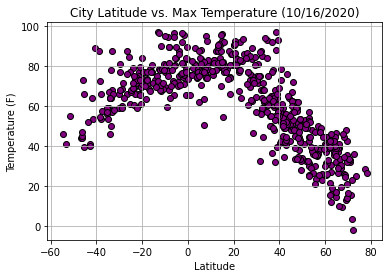

In [42]:
city_lat = city_weather_df["Latitude"]
city_temp = city_weather_df["Temperature"]
date = datetime.date.today()
date = time.strftime("(%m/%d/%Y)")


plt.scatter(city_lat, city_temp, marker="o", facecolor="purple", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("output_data/Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

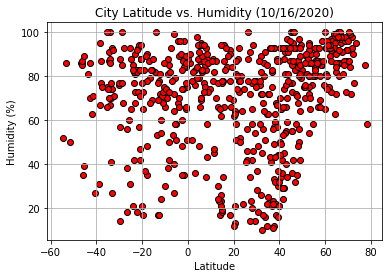

In [43]:
city_humid = city_weather_df["Humidity"]

plt.scatter(city_lat, city_humid, marker="o", facecolor="red", edgecolor="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

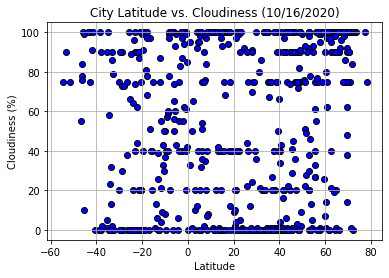

In [44]:
city_cloud = city_weather_df["Cloudiness"]

plt.scatter(city_lat, city_cloud, marker="o", facecolor="blue", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

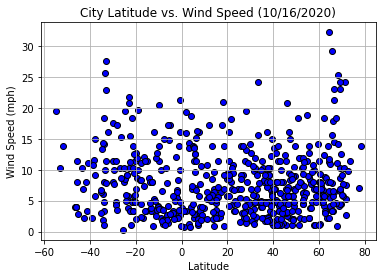

In [45]:
city_wind = city_weather_df["Windspeed"]

plt.scatter(city_lat, city_wind, marker="o", facecolor="blue", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Latitude_vs_Wind_speed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


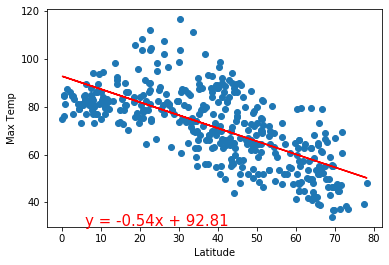

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


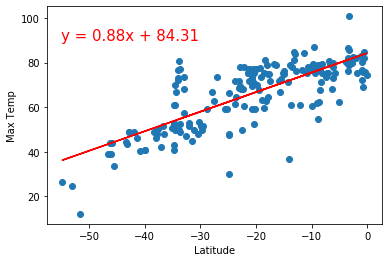

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


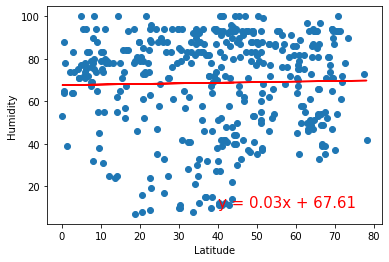

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


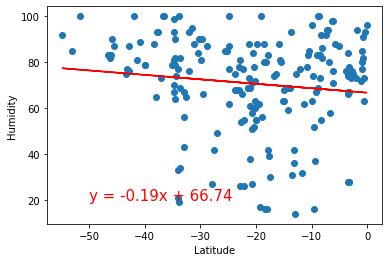

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


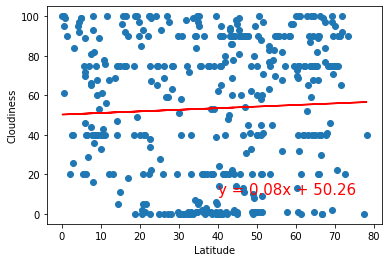

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


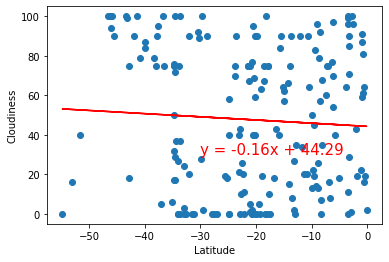

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


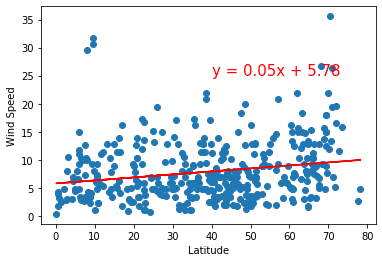

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


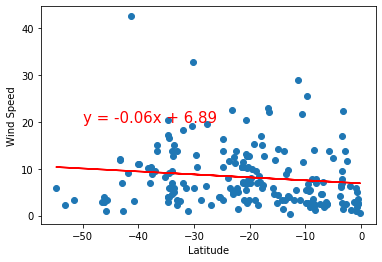